In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
   
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

# <center> Scaling

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Sebelum Feature Engineering

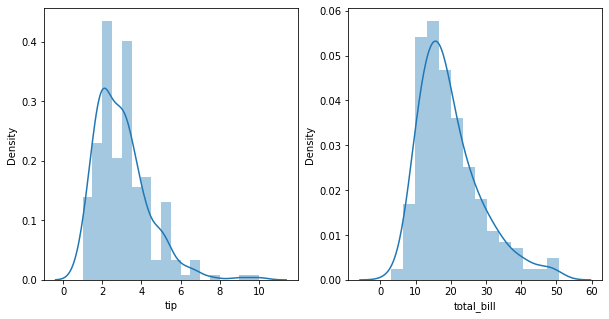

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.show()

Distribusi data right skew

In [4]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


## Scaling Proses

In [5]:
X = tips[['tip','total_bill']]

In [6]:
# Import Library
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

### MinMax Scaler

MinMax Scaler = merubah isi data dengan nilai terbesar = 1, nilai terkecil = 0, sensitif dengan outlier

In [7]:
X_minmax = minmax.fit_transform(X)
X_minmax= pd.DataFrame(X_minmax,columns=['tip','total_bill']) # MErubah araay menjadi dataframe

In [8]:
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [9]:
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


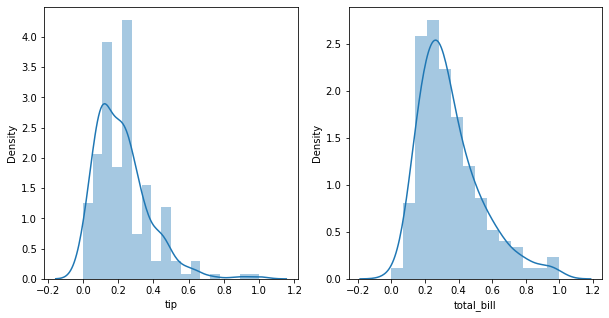

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_minmax['tip'])
plt.subplot(1,2,2)
sns.distplot(X_minmax['total_bill'])
plt.show()

* Bentuk persebaran data sama
* Terlihat perbedaan nilai dibandingkan dengan sebelum dilakukan scaling

### Standard Scaler

Transform semua variabel menjadi mean = 0 , standard deviasi = 1

In [11]:
X_standard = standard.fit_transform(X)
X_standard= pd.DataFrame(X_standard,columns=['tip','total_bill']) # MErubah araay menjadi dataframe

In [12]:
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [13]:
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.839259e-16,-7.871663e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


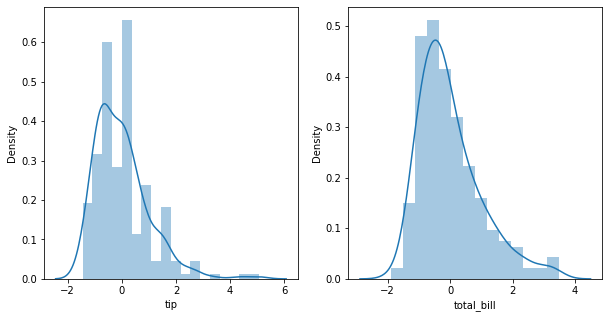

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_standard['tip'])
plt.subplot(1,2,2)
sns.distplot(X_standard['total_bill'])
plt.show()

* Bentuk persebaran data sama
* Terlihat perbedaan nilai dibandingkan dengan sebelum dilakukan scaling

## Robust Scaler

* transform semua variebel ke small range
* tidak sensitive pada outlier, karena diubah berdasarkan quantile

In [15]:
X_robust = robust.fit_transform(X)
X_robust= pd.DataFrame(X_robust,columns=['tip','total_bill']) # Merubah array menjadi dataframe

In [16]:
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [17]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


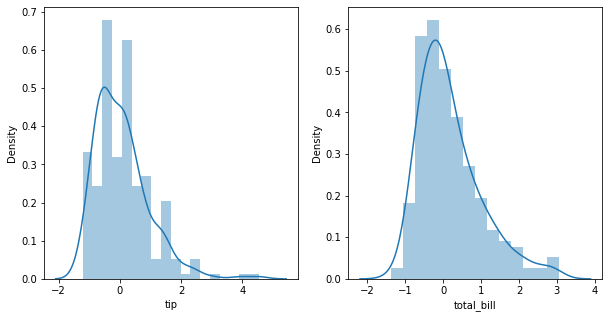

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_robust['tip'])
plt.subplot(1,2,2)
sns.distplot(X_robust['total_bill'])
plt.show()

* Bentuk persebaran data sama
* Terlihat perbedaan nilai dibandingkan dengan sebelum dilakukan scaling

Jika dilihat sekilas tidak ada perbedaan dari persebaran data, namun sebenarnya akan terlihat apabila gambar disatukan

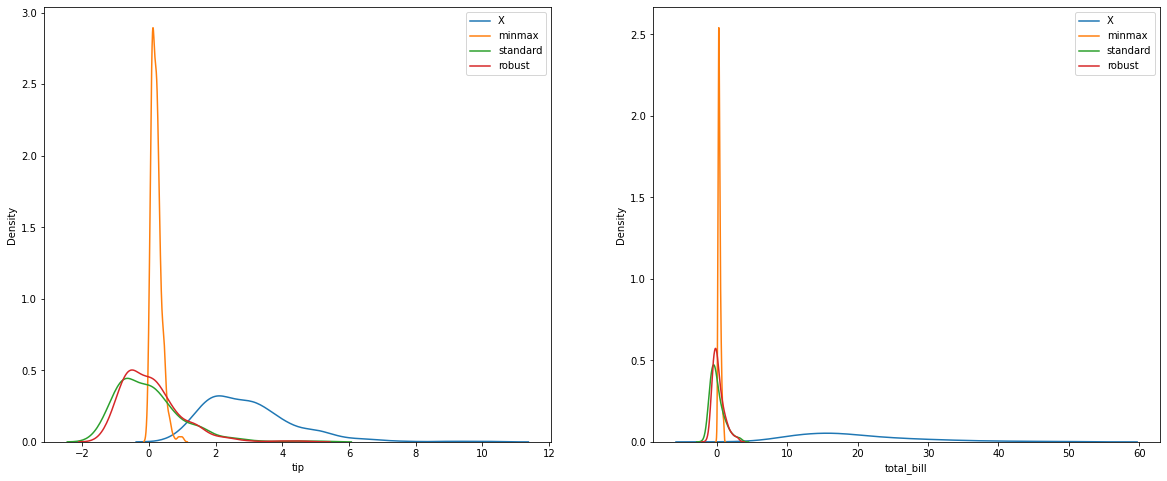

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(X['tip'],hist=False, label="X")
sns.distplot(X_minmax['tip'],hist=False, label="minmax")
sns.distplot(X_standard['tip'],hist=False, label="standard")
sns.distplot(X_robust['tip'],hist=False, label="robust")
plt.legend()
plt.subplot(1,2,2)
sns.distplot(X['total_bill'],hist=False, label="X")
sns.distplot(X_minmax['total_bill'],hist=False, label="minmax")
sns.distplot(X_standard['total_bill'],hist=False, label="standard")
sns.distplot(X_robust['total_bill'],hist=False, label="robust")
plt.legend()
plt.show()